HASHIR AZIZ
ROLL: BSAI 101

In [3]:
pip install opencv-python scikit-image matplotlib numpy

 Load a Standard Dataset Use a standard dataset like the "coins" image from Scikit-Image for
testing.

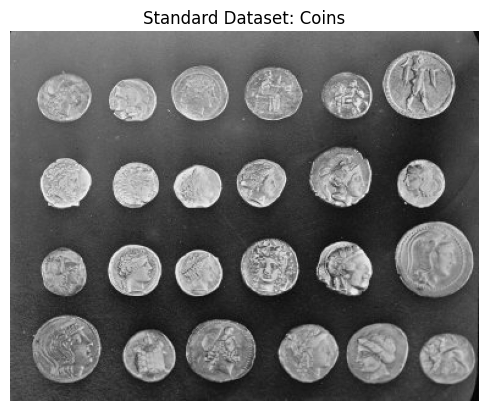

In [4]:
 from skimage import data, color
 from skimage.segmentation import slic, mark_boundaries
 from skimage.measure import regionprops
 from matplotlib import pyplot as plt
 # Load a standard dataset
 image = data.coins()  # Grayscale image of coins
 plt.imshow(image, cmap='gray')
 plt.title("Standard Dataset: Coins")
 plt.axis('off')
 plt.show()


Perform Region-Based Segmentation Here, we use SLIC (Simple Linear Iterative Clustering) for
region-based segmentation. It clusters pixels into superpixels.

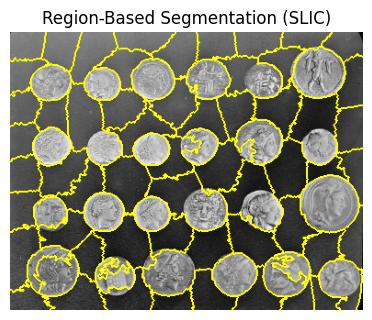

In [6]:
 # Convert image to color if required (SLIC works on color images)
 image_color = color.gray2rgb(image)
 # Apply SLIC segmentation
 segments = slic(image_color, n_segments=100, compactness=10,start_label=1)


 plt.figure(figsize=(10, 10))
 plt.subplot(1, 2, 1)
 plt.imshow(mark_boundaries(image_color, segments))
 plt.title("Region-Based Segmentation (SLIC)")
 plt.axis('off')
 plt.show()


 Fine-Tune Segmentation** Adjust parameters such as:
 n_segments: Number of segments (increase for finer segmentation). compactness: Controls
segment shape (low for irregular, high for compact)

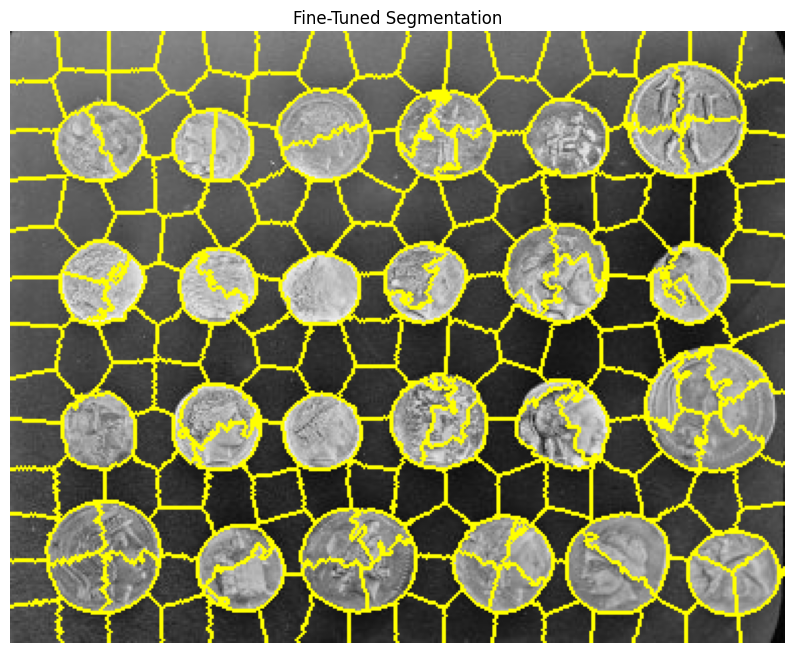

In [9]:
segments_fine =slic(image_color, n_segments= 200,compactness=20, start_label=1)
# Visualize the fine-tuned segmentation
plt.figure(figsize=(10, 10))
plt.imshow(mark_boundaries(image_color, segments_fine))
plt.title("Fine-Tuned Segmentation")
plt.axis('off')
plt.show()


 Analyze Results

In [15]:
from skimage.measure import label
# Label each segment
labeled_segments = label(segments_fine)
regions=regionprops(labeled_segments)
print("region areas")
for region in regions[:5]:
    print(f"Region {region.label}: {region.area} pixels")

region areas
Region 1: 594.0 pixels
Region 2: 487.0 pixels
Region 3: 487.0 pixels
Region 4: 649.0 pixels
Region 5: 533.0 pixels


 Upload and Test with a Custom Image

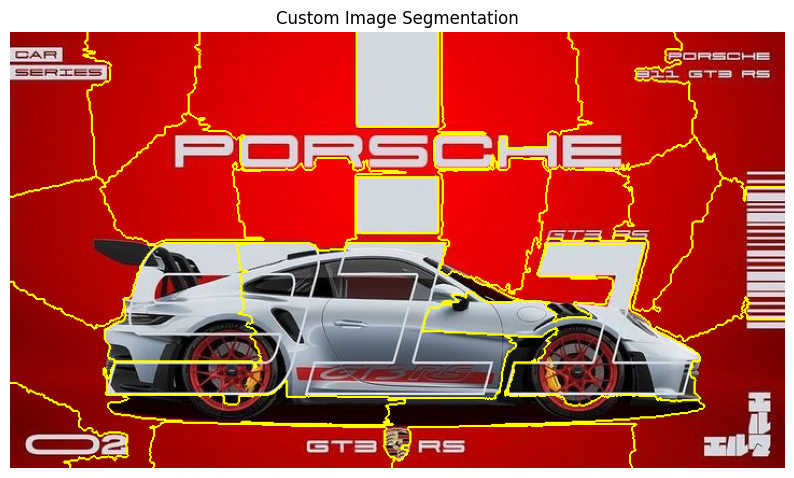

In [19]:
import cv2
from skimage.io import imread
 # Upload a custom image
image_path = "/content/sample_data/1.jpg"  # Replace with your image path
image_custom = cv2.imread(image_path)
image_custom = cv2.cvtColor(image_custom, cv2.COLOR_BGR2RGB)
# Apply SLIC on the custom image
segments_custom = slic(image_custom, n_segments=50, compactness=10,
start_label=1)
 # Visualize the segmentation
plt.figure(figsize=(10, 10))
plt.imshow(mark_boundaries(image_custom, segments_custom))
plt.title("Custom Image Segmentation")
plt.axis('off')
plt.show()

 Region based segmentation by using grid search


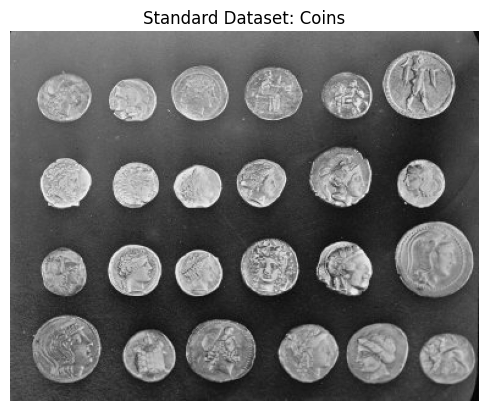

In [20]:
from skimage import data, color
from skimage.segmentation import slic, mark_boundaries
from skimage.measure import regionprops
from matplotlib import pyplot as plt
# Load a standard dataset
image = data.coins()  # Grayscale image of coins
plt.imshow(image, cmap='gray')
plt.title("Standard Dataset: Coins")
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Region-Based Segmentation (SLIC)')

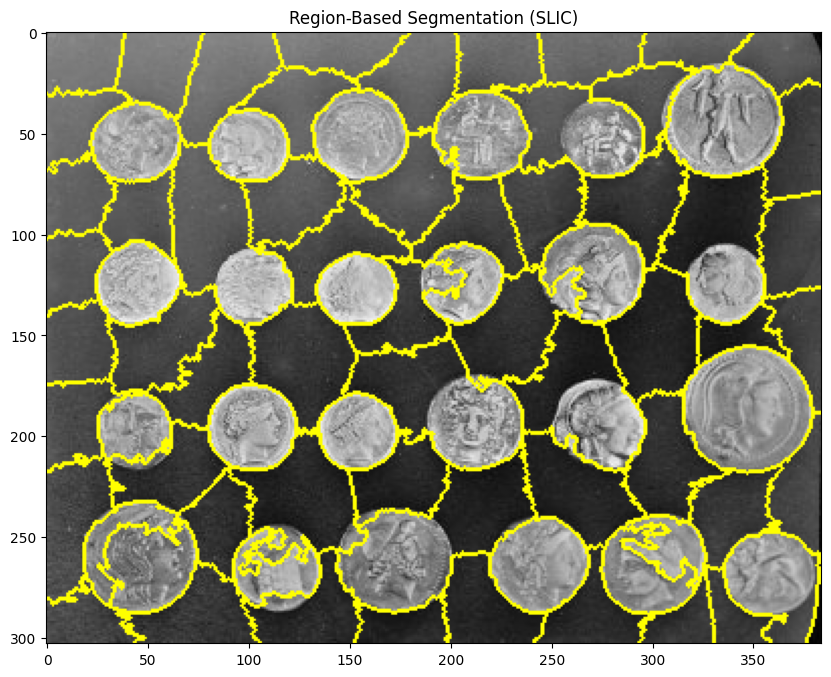

In [21]:
# Region based Segmentation
# Convert image to color if required (SLIC works on color images)
image_color = color.gray2rgb(image)
# Apply SLIC segmentation
segments = slic(image_color, n_segments=100, compactness=10,
start_label=1)
# Visualize the segmentation
plt.figure(figsize=(10, 10))
plt.imshow(mark_boundaries(image_color, segments))
plt.title("Region-Based Segmentation (SLIC)")


 Fine-Tune Using Grid Search

Best Parameters: {'compactness': 5, 'n_segments': 50}
Best Score: 3636.0


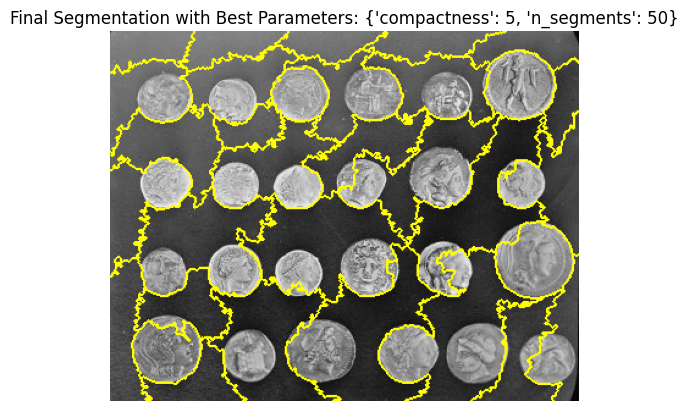

In [29]:
from skimage import data, color
from skimage.segmentation import slic, mark_boundaries
from skimage.measure import regionprops, label
from matplotlib import pyplot as plt
import numpy as np  # Correctly import numpy
from sklearn.model_selection import ParameterGrid

# ... (your existing code for loading and displaying the image) ...

def evaluate_segmentation(segments):
    """Evaluate segmentation by calculating the average region size."""
    labeled_segments = label(segments)
    regions = regionprops(labeled_segments)
    region_sizes = [region.area for region in regions]
    return np.mean(region_sizes)  # Return the calculated mean

# ... (your existing code for parameter grid definition) ...

# Grid search
for params in ParameterGrid(param_grid):
    segments = slic(image_color, n_segments=params['n_segments'],
                    compactness=params['compactness'], start_label=1)
    score = evaluate_segmentation(segments)
    if score > best_score:
        best_score = score
        best_params = params
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")
#Best Parameters: {'compactness': 5,
#                  'n_segments': 50}
#Best Score: 3636.0
# Apply segmentation with best parameters
final_segments = slic(image_color,
n_segments=best_params['n_segments'],
compactness=best_params['compactness'], start_label=1)
 # Visualize the final segmentation
plt.imshow(mark_boundaries(image_color, final_segments))
plt.title(f"Final Segmentation with Best Parameters: {best_params}")
plt.axis('off')
plt.show()

Number of Regions: 32
Average Region Size: 3636.00 pixels


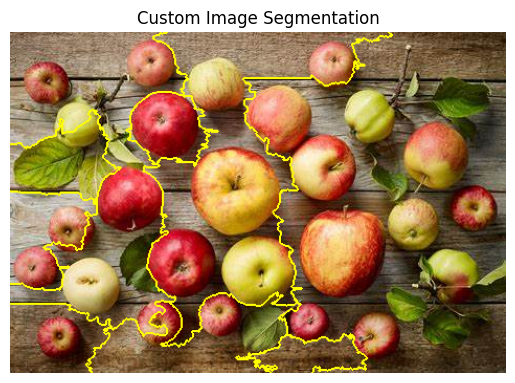

In [31]:
# analyze results
 # Analyze final segmentation
labeled_segments = label(final_segments)
regions = regionprops(labeled_segments)
 # Example: Print the number of regions and average region size
num_regions = len(regions)
avg_region_size = np.mean([region.area for region in regions])
print(f"Number of Regions: {num_regions}")
print(f"Average Region Size: {avg_region_size:.2f} pixels")
# Number of Regions: 32
# Average Region Size: 3636.00 pixels
# test
import cv2
# Load a custom image
image_path = "/content/apple.jpg"  # Replace with your image path
custom_image = cv2.imread(image_path)
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)
# Apply SLIC with best parameters
custom_segments = slic(custom_image,
n_segments=best_params['n_segments'],
compactness=best_params['compactness'], start_label=1)
# Visualize segmentation
plt.imshow(mark_boundaries(custom_image, custom_segments))
plt.title("Custom Image Segmentation")
plt.axis('off')
plt.show()

TRYING WITH DIFFERENT DATASET


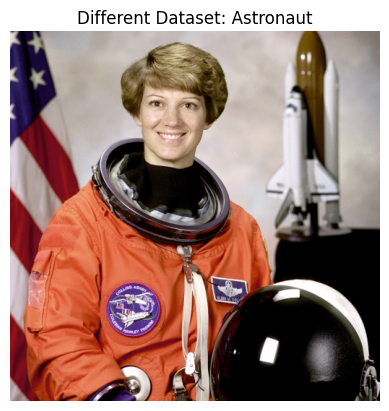

In [32]:
from skimage import data, color
from matplotlib import pyplot as plt
# Load a different standard dataset (Astronaut)
image = data.astronaut()
plt.imshow(image)
plt.title("Different Dataset: Astronaut")
plt.axis('off')
plt.show()

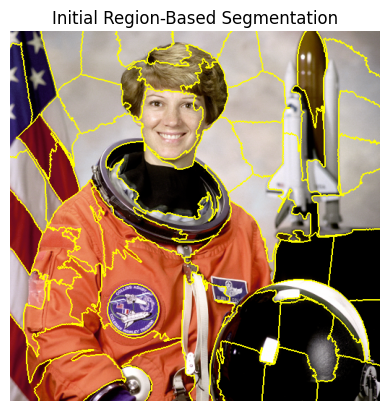

In [33]:
from skimage.segmentation import slic, mark_boundaries
# Apply initial SLIC segmentation
segments = slic(image, n_segments=100, compactness=10, start_label=1)
# Visualize the segmentation
plt.imshow(mark_boundaries(image, segments))
plt.title("Initial Region-Based Segmentation")
plt.axis("off")
plt.show()



Best Parameters: {'compactness': 5, 'n_segments': 50}
Best Score: 12483.047619047618


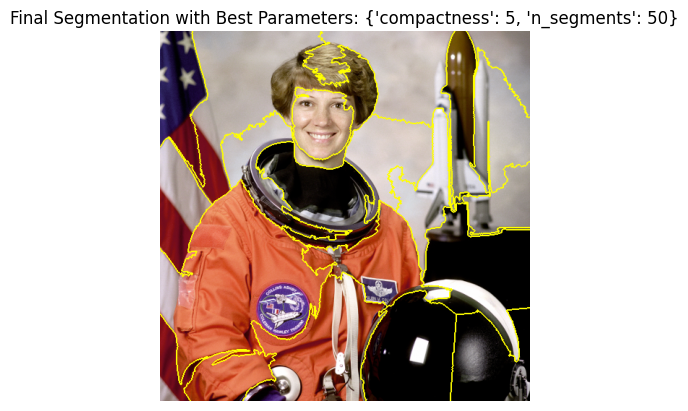

In [36]:
from skimage.measure import label, regionprops
import numpy as np
def evaluate_segmentation(segments):
    """Evaluate segmentation by calculating the average region size."""
    labeled_segments = label(segments)
    regions = regionprops(labeled_segments)
    region_sizes = [region.area for region in regions]
    return np.mean(region_sizes)

from sklearn.model_selection import ParameterGrid
# Define the parameter grid
param_grid = {
    'n_segments': [50, 100, 150, 200],
    'compactness': [5, 10, 20]
}
best_score = -np.inf
best_params = None
# Grid search over parameter combinations
for params in ParameterGrid(param_grid):

    segments = slic(image, n_segments=params['n_segments'], compactness=params['compactness'], start_label=1)
    score = evaluate_segmentation(segments)
    if score > best_score:
        best_score = score
        best_params = params
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")
# Best Parameters: {'compactness': 5, 'n_segments': 50}
# Best Score: 12483.047619047618
# Apply segmentation with best parameters
final_segments = slic(image, n_segments=best_params['n_segments'],
compactness=best_params['compactness'], start_label=1)
# Visualize the final segmentation
plt.imshow(mark_boundaries(image, final_segments))
plt.title(f"Final Segmentation with Best Parameters: {best_params}")
plt.axis('off')
plt.show()



Number of Regions: 21
Average Region Size: 12483.05 pixels


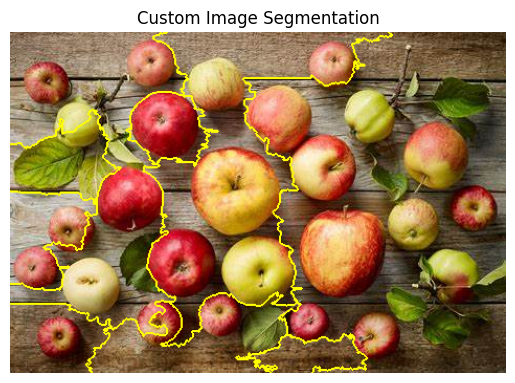

In [39]:
# Analyze final segmentation
labeled_segments = label(final_segments)
regions = regionprops(labeled_segments)
 # Number of regions
num_regions = len(regions)
 # Average region size
avg_region_size = np.mean([region.area for region in regions])
print(f"Number of Regions: {num_regions}")
print(f"Average Region Size: {avg_region_size:.2f} pixels")
# Number of Regions: 21
# Average Region Size: 12483.05 pixels
# test
import cv2
# Load a custom image
image_path = "/content/apple.jpg"  # Replace with your image path
custom_image = cv2.imread(image_path)
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)
# Apply SLIC with best parameters
custom_segments = slic(custom_image,
n_segments=best_params['n_segments'],
compactness=best_params['compactness'], start_label=1)
# Visualize segmentation
plt.imshow(mark_boundaries(custom_image, custom_segments))
plt.title("Custom Image Segmentation")
plt.axis('off')
plt.show()


watershed transformation-based segmentation

In [40]:
pip install scikit-image opencv-python matplotlib numpy

Load a Landscape Dataset

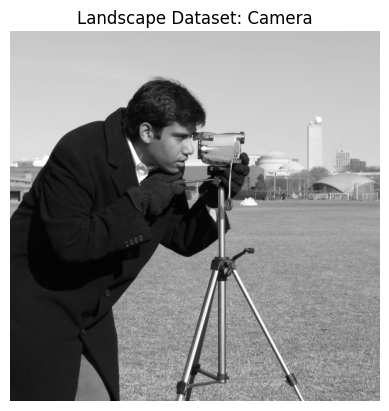

In [41]:
from skimage import data, color
from matplotlib import pyplot as plt
# Load a landscape dataset
landscape_image = data.camera()  # Grayscale landscape image
# Display the image
plt.imshow(landscape_image, cmap='gray')
plt.title("Landscape Dataset: Camera")
plt.axis('off')
plt.show()


Preprocessing For watershed transformation, preprocessing is critical. We will:
 Smooth the image to reduce noise. Compute a gradient image for edge detection.

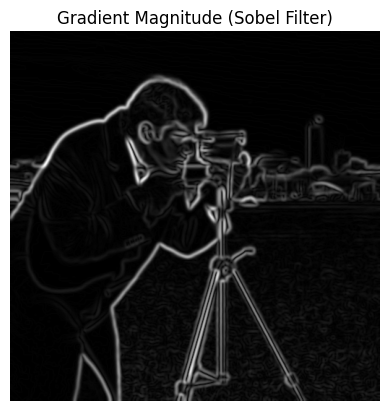

In [42]:
from skimage.filters import sobel
from scipy.ndimage import gaussian_filter
 # Smooth the image to reduce noise
smoothed_image = gaussian_filter(landscape_image, sigma=2)
# Compute the gradient magnitude using Sobel filter
gradient =sobel(smoothed_image)
# Display the gradient
plt.imshow(gradient, cmap='gray')
plt.title("Gradient Magnitude (Sobel Filter)")
plt.axis('off')
plt.show()



Apply Initial Watershed Segmentation

In [ ]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage as ndi
import numpy as np # Compute distance transform
distance = ndi.distance_transform_edt(smoothed_image)
# Detect local maxima
local_maxi = peak_local_max(distance, num_peaks=np.inf,
footprint=np.ones((3, 3)) labels=smoothed_image)
# Create a markers array with the same shape as the image and initialize with zeros markers = np.zeros_like(smoothed_image, dtype=int)
 # Set the marker values at the local maxima coordinates
 markers[local_maxi[:, 0
 ], local_maxi[:, 1
 ]] =
len
 (local_maxi)) + 1
 # Assign unique labels to each marker
 # Apply watershed transformation
